In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import prepare_data

In [3]:
original_test_df = pd.read_csv('./Data/test.csv')
original_train_df = pd.read_csv('./Data/train.csv')
train_df = None
test_df = None
train_df = prepare_data.titanic_data_shaping(original_train_df)
test_df = prepare_data.titanic_data_shaping(original_test_df)

In [4]:
def build_model(model_learning_rate,feature_size,classification_threshold):
    model = tf.keras.models.Sequential()
  
    model.add(tf.keras.layers.Dense(units=1,input_shape=(feature_size,),activation=tf.keras.activations.sigmoid))

    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=model_learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[
            tf.keras.metrics.BinaryAccuracy(name='accuracy',threshold=classification_threshold),
            tf.keras.metrics.Precision(name='precision',thresholds=classification_threshold),
            tf.keras.metrics.Recall(name='recall',thresholds=classification_threshold)]
        )

    return model

In [5]:
def train_model(model, feature, label, epochs, validation_split):
    history = model.fit(
        x=feature,
        y=label,
        batch_size=None,
        epochs=epochs,
        shuffle=True,
        validation_split=validation_split)

    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    epochs = history.epoch

    hist = pd.DataFrame(history.history)


    return trained_weight, trained_bias, epochs, hist



In [6]:
def plot_results(epochs,metric,hist):
    #Loss curve
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.plot(epochs, hist[metric], label=metric,c='r')
    plt.plot(epochs, hist['val_'+metric], label='validation '+metric,c='b')
    plt.legend()
    plt.ylim([0.2, 1.0])
    plt.show()



Epoch 1/150
23/23 [==============================] - 1s 40ms/step - loss: 0.7217 - accuracy: 0.5478 - precision: 0.3256 - recall: 0.1516 - val_loss: 0.6886 - val_accuracy: 0.6257 - val_precision: 0.4583 - val_recall: 0.1692
Epoch 2/150
23/23 [==============================] - 0s 7ms/step - loss: 0.7146 - accuracy: 0.5688 - precision: 0.3469 - recall: 0.1227 - val_loss: 0.6807 - val_accuracy: 0.6257 - val_precision: 0.4583 - val_recall: 0.1692
Epoch 3/150
23/23 [==============================] - 0s 9ms/step - loss: 0.7090 - accuracy: 0.5688 - precision: 0.3469 - recall: 0.1227 - val_loss: 0.6742 - val_accuracy: 0.6257 - val_precision: 0.4583 - val_recall: 0.1692
Epoch 4/150
23/23 [==============================] - 0s 8ms/step - loss: 0.7041 - accuracy: 0.5688 - precision: 0.3469 - recall: 0.1227 - val_loss: 0.6691 - val_accuracy: 0.6257 - val_precision: 0.4583 - val_recall: 0.1692
Epoch 5/150
23/23 [==============================] - 0s 7ms/step - loss: 0.7002 - accuracy: 0.5688 - precis

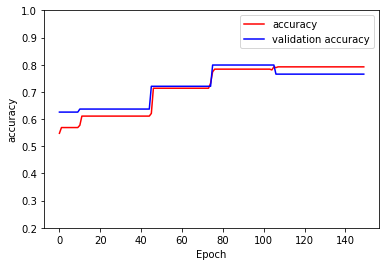

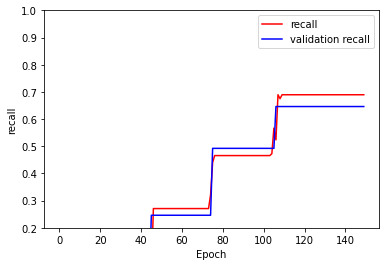

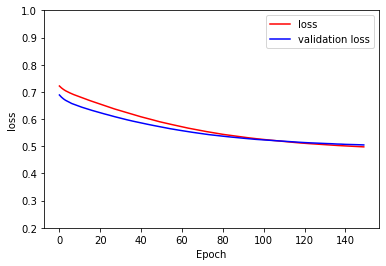

In [7]:
# Hyperparameters.
learning_rate = 0.001
epochs = 150
batch_size = 10

validation_split = 0.2
classification_threshold = 0.5

#my_feature = ["Pclass","Feature_Title","Sex","Feature_Age","SibSp","Parch","Feature_Ticket_Number"]
my_feature = ["Pclass","Sex"]

my_label="Survived" 

# Discard any pre-existing version of the model.
my_model = None

# Save previous results
#prev_hist = hist
#prev_epochs = epochs

# Build and Train
my_model = build_model(learning_rate,len(my_feature),classification_threshold)
weight, bias, epochs, hist = train_model(my_model, train_df[my_feature], train_df[my_label], epochs, validation_split)

plot_results(epochs,'accuracy',hist)
plot_results(epochs,'recall',hist)
plot_results(epochs,'loss',hist)

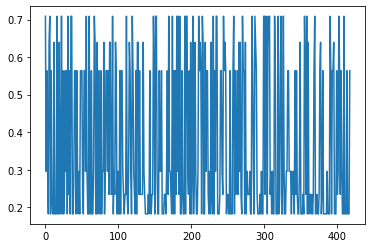

In [8]:
# Predict
plt.plot(my_model.predict(test_df[my_feature]))

In [9]:
# Prepare sumbmission file
prediction_df = test_df[["PassengerId"]].copy()

In [10]:
list_of_list = (my_model.predict(test_df[my_feature]) >= classification_threshold).astype(int).tolist()
survived_list = [item for elem in list_of_list for item in elem]
prediction_df = prediction_df.assign(Survived=survived_list)

In [11]:
prediction_df.to_csv('./deeplearning_submission.csv',index=False,header=True)

In [12]:
example_csv = pd.read_csv('./Data/gender_submission.csv')
prediction_csv = pd.read_csv('./deeplearning_submission.csv')
example_csv.Survived.value_counts(), prediction_csv.Survived.value_counts()